# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [1]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [2]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            # 'W': np.random.uniform(-0.2, 0.2, (dim_in, dim_out)),
            # 'b': np.zeros((1, dim_out)),
            'W': initializer(dim_in, dim_out),
            'b': initializer(1, dim_out),
        }
        self.reg = reg
        self.alpha = alpha
        self.grads = dict()
        self.cache = dict()

    def _forward(self, x):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = np.dot(x, self.params['W']) + self.params['b']
        self.cache['reg_loss'] = self.alpha * np.sum(self.params['W'] * self.params['W']) if self.reg else 0
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_b = np.sum(upstream, axis=0, keepdims=True)
        grad_w = np.dot(self.cache['x'].T, upstream)
        grad_x = np.dot(upstream, self.params['W'].T)
        grad_reg = 2 *  self.params['W'] * self.alpha if self.reg else 0

        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg': grad_reg
        }


In [3]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(x, y))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=0.001)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

#### ReLU Layer (5 Points)

In [4]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = x.copy()
        y[y<0] = 0
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x = upstream.copy()
        grad_x[self.cache['x']<0] = 0
        self.grads['x'] = grad_x


In [5]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.0584373  0.88325126 0.26846461 0.89464548 0.50320908]
 [0.09177401 0.38804983 0.72265477 0.53096799 0.3455338 ]
 [0.24378035 0.21950653 0.93640053 0.87820106 0.33644566]
 [0.87531923 0.36254974 0.54245228 0.95475059 0.96677731]
 [0.52121319 0.0189511  0.32733035 0.67793154 0.20010495]
 [0.7436883  0.46844046 0.26309046 0.4595906  0.83244012]
 [0.62944357 0.72287473 0.73348264 0.21539666 0.77413853]
 [0.20357441 0.51746258 0.75884962 0.6687436  0.51406511]
 [0.71992879 0.77988594 0.72842911 0.12522849 0.8795159 ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [6]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    #########################################
    ##              Your Code              ##
    #########################################
    array2 = array.copy()
    if axis == 1:
        array2 = array2.T
    res = np.logaddexp(array2[0], array2[1])
    for i in range(2, len(array2)):
        res = np.logaddexp(res, array2[i])
    if axis == 1:
        res = res.T
    return res


In [7]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = x.copy()
        y -= logsumexp(y, axis=1).reshape(-1, 1)
        self.cache['y'] = y

        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x = upstream - (np.exp(self.cache['y']) * np.sum(upstream, axis=1).reshape(-1, 1))
        self.grads['x'] = grad_x


In [8]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [9]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        o = x.copy()
        for layer in self.layers:
            o = layer(o)
        return o
    
    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in reversed(self.layers):
            layer.backward(upstream)
            upstream = layer.grads['x']

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        parametric_layers = []
        for layer in self.layers:
            if hasattr(layer, 'params'):
                parametric_layers.append(layer)
        return parametric_layers

## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [10]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = logprobs.copy()
        y = (y[np.arange(len(y)), targets])
        y *= -1
        y = y.sum()
        if self.mean:
            y /= len(targets)
        
        self.cache['logprobs'] = logprobs
        self.cache['targets'] = targets
        self.cache['len'] = len(targets)

        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_scores = np.zeros_like(self.cache['logprobs'])
        grad_scores[np.arange(self.cache['len']), self.cache['targets']] -= 1
        if self.mean:
            grad_scores /= self.cache['len']
        grad_scores *= upstream
        self.grads['x'] = grad_scores

In [11]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[ 0. -1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]
 [ 0. -1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.]]
Relative error of delta-loss:
2.771220752873717e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [12]:
class Optimizer():
    """
    Our main optimization class.
    
    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self):
        """
        Perform sgd update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            for param in layer.params:
                if param == 'W':
                    grad = layer.grads[param] + layer.grads['reg']
                else:
                    grad = layer.grads[param]
                layer.params[param] -= self.lr * grad
        
    
    def _momentum(self, mom_coeff):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            if 'last_update' not in layer.params:
                layer.params['last_update'] = {}
            for param in layer.params:
                if param == 'last_update':
                    continue
                if param not in layer.params['last_update']:
                    layer.params['last_update'][param] = np.zeros_like(layer.params[param])
                
                if param == 'W':
                    grad = layer.grads[param] + layer.grads['reg']
                else:
                    grad = layer.grads[param]
                update = mom_coeff * layer.params['last_update'][param] - self.lr * grad
                layer.params['last_update'][param] = update
                layer.params[param] += update

# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [65]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
!./cifar10_downloader.bash

In [13]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [14]:
data.keys()

dict_keys(['X_train', 'Y_train', 'X_test', 'Y_test'])

In [15]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
X_train = data['X_train']
Y_train = data['Y_train']

def train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0):
    np.random.seed(random_state)
    data_len = len(X)
    new_x = X.copy()
    new_y = y.copy()
    if shuffle:
        p = np.random.permutation(data_len)
        new_x, new_y = X[p], y[p]
    len_test = int(np.ceil(test_size * data_len))
    return new_x[len_test:], new_x[:len_test], new_y[len_test:], new_y[:len_test]

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.15, random_state=11)

data['X_train'] = X_train
data['Y_train'] = Y_train
data['X_val'] = X_val
data['Y_val'] = Y_val

##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3400, 32, 32, 3)
Y_train: (3400,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_val: (600, 32, 32, 3)
Y_val: (600,)


In [16]:
number_of_labes = len(np.unique(Y_train))

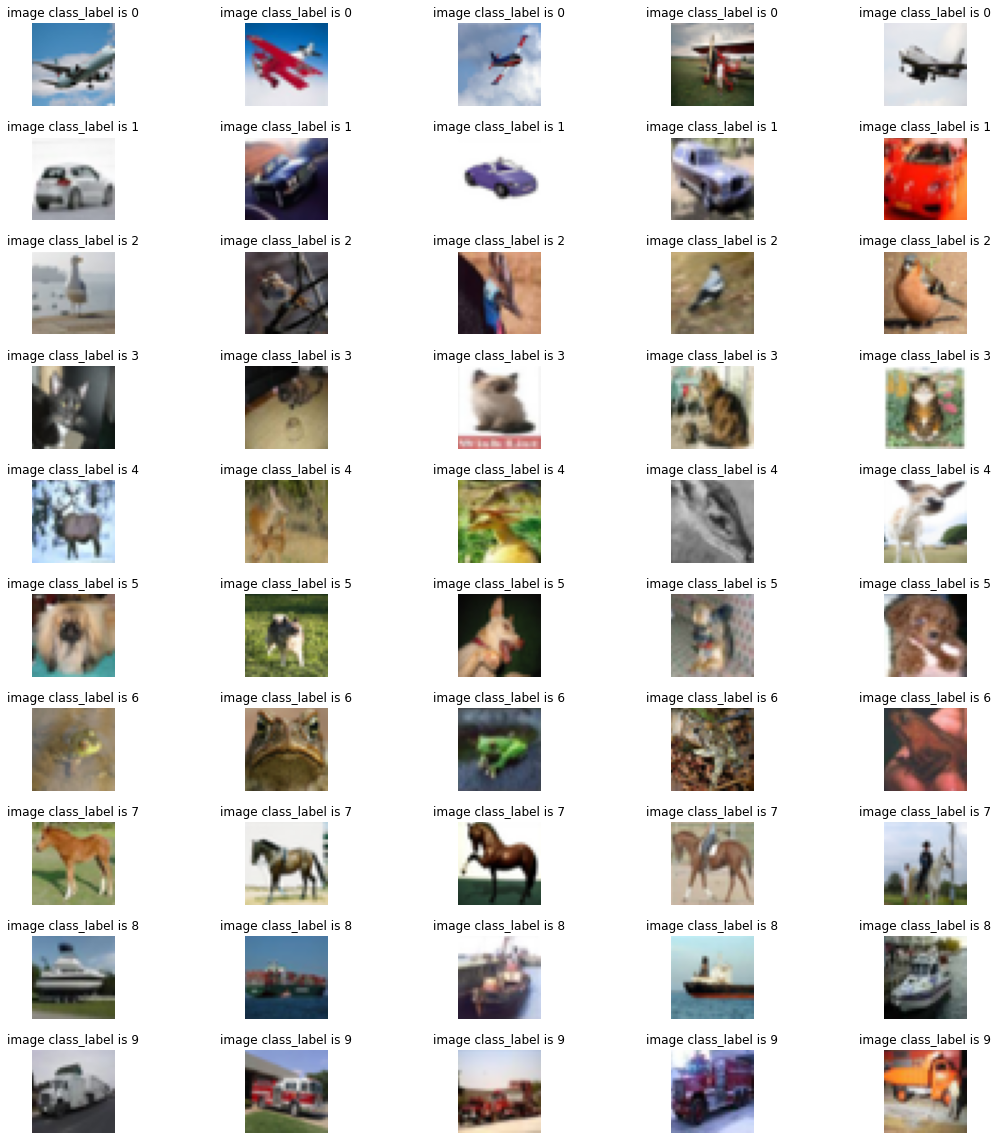

In [17]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
import matplotlib.pyplot as plt
import numpy as np

def sample_from_label(x, y, label, num=5):
    x2 = x[y == label]
    return x2[np.random.randint(x2.shape[0], size=num), :]

fig, axs = plt.subplots(number_of_labes, 5, figsize=(16, 16), tight_layout=True)
for i in range(number_of_labes):
  sampled = sample_from_label(X_train, Y_train, i)
  for j, img in enumerate(sampled):
    axs[i, j].imshow(img)
    axs[i, j].set_title(f'image class_label is {i}', fontsize=12)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])

In [18]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################

def normalize_images(x, mean, std):
    return (x - mean) / std


X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

x = np.concatenate([X_train, X_val], axis=0)

mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

X_train = normalize_images(X_train, mean, std)
X_val = normalize_images(X_val, mean, std)

X_test = data['X_test']
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = normalize_images(X_test, mean, std)

data['X_train'] = X_train
data['X_val'] = X_val
data['X_test'] = X_test

#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3400, 3072)
Y_train: (3400,)
X_test: (1000, 3072)
Y_test: (1000,)
X_val: (600, 3072)
Y_val: (600,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [19]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            type : one of {'train', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        self.indices = None
        self.num_batches = None
        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################
        self.num_batches = int(np.ceil(self.dataset[self.x_key].shape[0] / self.batch_size).astype(int))
        self.indices = [np.random.choice(self.dataset[self.x_key].shape[0], size=self.batch_size, replace=False) for _ in range(self.num_batches)]

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [27]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    #################################
    ##          Your Code          ##
    #################################
    for pred, real in zip(preds, reals):
        conf_matrix[real, pred] += 1
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix
        
    Returns:
        f1 : macro f1 score
    """
    #################################
    ##          Your Code          ##
    #################################
    f1_scores = []
    for i in range(confusion_matrix.shape[0]):
        if np.sum(confusion_matrix[i, :]) == 0 or np.sum(confusion_matrix[:, i]) == 0:
            f1 = 0
        else:       
            recall = confusion_matrix[i, i] / np.sum(confusion_matrix[i, :])
            precision = confusion_matrix[i, i] / np.sum(confusion_matrix[:, i])
            if (precision + recall) < 1e-6:
                f1 = 0
            else:
                f1 = 2 * (precision * recall) / (precision + recall)
        f1_scores.append(f1)
    f1_score = np.mean(f1_scores)
    return f1_score

### Define Model
Define an MLP model to solve classification problem.

In [149]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################

def initializer(dim_in, dim_out):
    return np.random.normal(0, 1, (dim_in, dim_out)) * np.sqrt(2 / dim_in)

reg_coeff = 0.2
reg = True

layers = [
    LinearLayer(3072, 1000, initializer, reg=reg, alpha=reg_coeff),
    ReLU(),
    LinearLayer(1000, 256, initializer, reg=reg, alpha=reg_coeff),
    ReLU(),
    LinearLayer(256, 100, initializer, reg=reg, alpha=reg_coeff),
    ReLU(),
    LinearLayer(100, 32, initializer, reg=reg, alpha=reg_coeff),
    ReLU(),
    LinearLayer(32, 10, initializer, reg=reg, alpha=reg_coeff),
    LogSoftMax()
]
model = MLPModel(layers)

In [150]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 10
batch_size = 32
lr = 1e-4
mom_coeff = 0.4

In [151]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(model.get_parameters(), 'momentum', lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size, data, 'train')
val_sampler = RandomSampler(batch_size * 2, data, 'val')
test_sampler = RandomSampler(batch_size * 2, data, 'test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [152]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    N = 0
    epoch_all = 0
    epoch_true = 0
    confusion = np.zeros((10, 10))
    
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            predictions = model(x)
            loss = criterion(predictions, y)
            for layer in model.layers:
                if isinstance(layer, LinearLayer) and layer.reg:
                    loss += layer.cache['reg_loss']
            total_loss += loss
            hard_predictions = predictions.argmax(-1)
            N += len(hard_predictions)
            criterion.backward(1)
            model.backward(criterion.grads['x'])
            optimizer.step(mom_coeff)         
            
            epoch_all += len(hard_predictions)
            epoch_true += (hard_predictions == y).sum()        
            acc = (epoch_true / epoch_all) * 100
            
            confusion = update_confusion_matrix(confusion, hard_predictions, y)
            f1 = f1_score(confusion)
            
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for train phase
    train_losses.append(total_loss/N)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    N = 0
    epoch_all = 0
    epoch_true = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            predictions = model(x)
            loss = criterion(predictions, y)
            for layer in model.layers:
                if isinstance(layer, LinearLayer) and layer.reg:
                    loss += layer.cache['reg_loss']
            total_loss += loss
            hard_predictions = predictions.argmax(-1)
            N += len(hard_predictions)

            epoch_all += len(hard_predictions)
            epoch_true += (hard_predictions == y).sum()
            acc = (epoch_true / epoch_all) * 100

            confusion = update_confusion_matrix(confusion, hard_predictions, y)
            f1 = f1_score(confusion)

            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/N)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################
    if f1 > best_f1:
        best_f1 = f1
        best_model = copy.deepcopy(model)
    
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

Train 0 | Loss:1.95e+01 | Acc: 25.61| F1: 0.25|: 100%|██████████| 107/107 [00:08<00:00, 12.91it/s]
Val   0 | Loss:1.06e+01 | Acc: 27.97| F1: 0.27|: 100%|██████████| 10/10 [00:00<00:00, 27.46it/s]


----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:1.88e+01 | Acc: 41.85| F1: 0.41|: 100%|██████████| 107/107 [00:08<00:00, 13.12it/s]
Val   1 | Loss:1.04e+01 | Acc: 30.47| F1: 0.29|: 100%|██████████| 10/10 [00:00<00:00, 31.04it/s]


----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:1.83e+01 | Acc: 51.29| F1: 0.51|: 100%|██████████| 107/107 [00:08<00:00, 12.77it/s]
Val   2 | Loss:1.03e+01 | Acc: 30.47| F1: 0.29|: 100%|██████████| 10/10 [00:00<00:00, 32.27it/s]


----------------------------[Epoch3 finished!]----------------------------


Train 3 | Loss:1.79e+01 | Acc: 59.87| F1: 0.60|: 100%|██████████| 107/107 [00:07<00:00, 13.55it/s]
Val   3 | Loss:1.01e+01 | Acc: 31.09| F1: 0.30|: 100%|██████████| 10/10 [00:00<00:00, 30.08it/s]


----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:1.75e+01 | Acc: 67.06| F1: 0.67|: 100%|██████████| 107/107 [00:07<00:00, 13.69it/s]
Val   4 | Loss:1.00e+01 | Acc: 32.81| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 31.33it/s]


----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:1.72e+01 | Acc: 72.72| F1: 0.73|: 100%|██████████| 107/107 [00:07<00:00, 13.61it/s]
Val   5 | Loss:9.93e+00 | Acc: 35.31| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 32.99it/s]


----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:1.68e+01 | Acc: 77.89| F1: 0.78|: 100%|██████████| 107/107 [00:08<00:00, 12.31it/s]
Val   6 | Loss:9.84e+00 | Acc: 36.09| F1: 0.35|: 100%|██████████| 10/10 [00:00<00:00, 29.94it/s]


----------------------------[Epoch7 finished!]----------------------------


Train 7 | Loss:1.65e+01 | Acc: 82.04| F1: 0.82|: 100%|██████████| 107/107 [00:09<00:00, 11.64it/s]
Val   7 | Loss:9.73e+00 | Acc: 38.12| F1: 0.37|: 100%|██████████| 10/10 [00:00<00:00, 42.96it/s]


----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:1.62e+01 | Acc: 85.34| F1: 0.85|: 100%|██████████| 107/107 [00:11<00:00,  9.46it/s]
Val   8 | Loss:9.65e+00 | Acc: 38.75| F1: 0.38|: 100%|██████████| 10/10 [00:00<00:00, 20.00it/s]


----------------------------[Epoch9 finished!]----------------------------


Train 9 | Loss:1.59e+01 | Acc: 88.43| F1: 0.89|: 100%|██████████| 107/107 [00:17<00:00,  6.27it/s]
Val   9 | Loss:9.56e+00 | Acc: 38.44| F1: 0.37|: 100%|██████████| 10/10 [00:00<00:00, 16.38it/s]

----------------------------[Epoch10 finished!]----------------------------


### Test Model

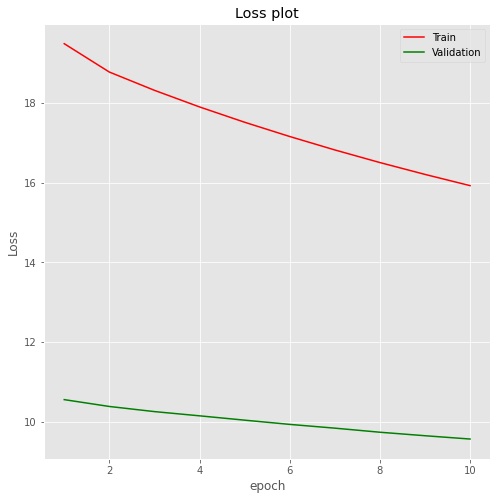

In [153]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
ls_epoch = [_ + 1 for _ in range(n_epochs)]
plt.plot(ls_epoch, train_losses, color='r', label='Train')
plt.plot(ls_epoch, val_losses, color='g', label='Validation')
plt.title('Loss plot')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()  

In [154]:
print(f'Best F1 score: {best_f1:.2f}')

Best F1 score: 0.38


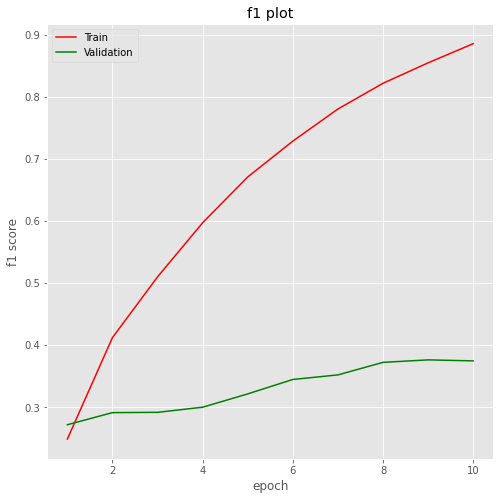

In [155]:
ls_epoch = [_ + 1 for _ in range(n_epochs)]
plt.title('f1 plot')
plt.ylabel('f1 score')
plt.plot(ls_epoch, train_f1, color='r', label='Train')
plt.plot(ls_epoch, val_f1, color='g', label='Validation')
plt.xlabel('epoch')
plt.legend()
plt.show()   

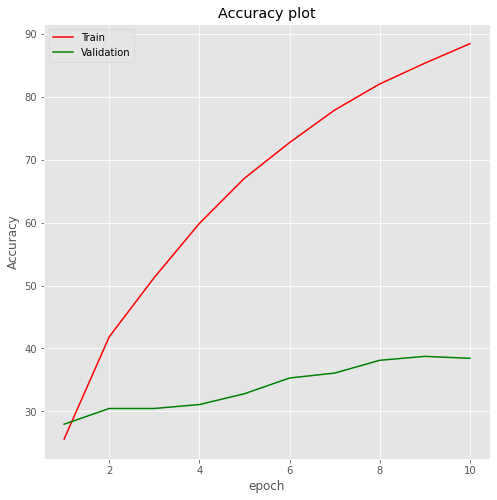

In [156]:
ls_epoch = [_ + 1 for _ in range(n_epochs)]
plt.title('Accuracy plot')
plt.ylabel('Accuracy')
plt.plot(ls_epoch,train_accs, color='r', label='Train')
plt.plot(ls_epoch, val_accs, color='g', label='Validation')
plt.xlabel('epoch')
plt.legend()
plt.show()  

In [157]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
X_test = data['X_test']
y_test = data['Y_test']
predictions = best_model(X_test)
loss = criterion(predictions, y_test)
for layer in best_model.layers:
    if isinstance(layer, LinearLayer) and layer.reg:
        loss += layer.cache['reg_loss']
hard_predictions = predictions.argmax(-1)
confusion = np.zeros((10, 10))

all_predicted_len = len(hard_predictions)
predicted_true = (hard_predictions == y_test).sum()
acc = (predicted_true / all_predicted_len) * 100

confusion = update_confusion_matrix(confusion, hard_predictions, y_test)
f1 = f1_score(confusion)

print(f'Loss:{loss/all_predicted_len:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')

Loss:2.46e+00 | Acc: 38.40| F1: 0.38|


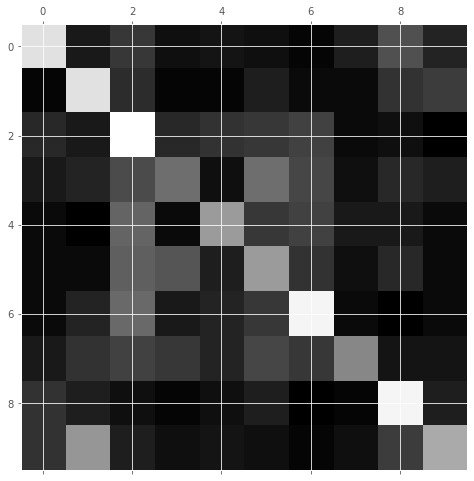

In [158]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

In [159]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 5
weights = best_model.layers[0].params['W']
weights = weights[:, np.random.randint(weights.shape[1], size=n)]
weights = weights.reshape(n, 32, 32, 3)


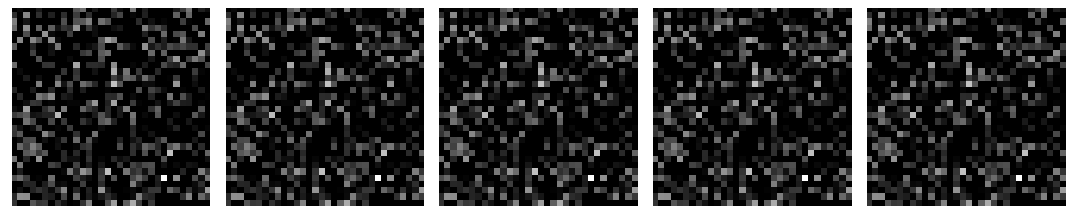

In [160]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

fig, axs = plt.subplots(1, n, figsize=(15, 15), tight_layout=True)
for i in range(n):
  for j, img in enumerate(weights):
    img = rgb2gray(img)
    img = img / np.amax(img)
    img = np.clip(img, 0, 1)
    axs[i].imshow(img, cmap='gray')
    axs[i].set_xticks([])
    axs[i].set_yticks([])